## *Here’s How to Build a Pivot Table using Pandas in Python*

In [11]:
import pandas as pd
import numpy as np
df=pd.read_csv('train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### I will be dropping a few features to make it easier to analyze the data and demonstrate the capabilities of the pivot_table function:

In [4]:
df.drop(['PassengerId','Ticket','Name'],inplace=True,axis=1)


## How to group data using index in a pivot table?
* *Pivot_table requires a data and an index parameter*
* Data is the Pandas dataframe you pass to the function
* Index is the feature that allows you to group your data. The index feature will appear as an index in the resultant table
### I will be using the ‘Sex’ column as the index for now:

In [5]:
#a single index
table = pd.pivot_table(data=df,index=['Sex'])
table

,Age,Fare,Parch,Pclass,SibSp,Survived
Sex,,,,,,
female,27.915709,44.479818,0.649682,2.159236,0.694268,0.742038
male,30.726645,25.523893,0.235702,2.389948,0.429809,0.188908


### We can instantly compare all the feature values for both the genders. Now, let’s visualize the finding:

<AxesSubplot:xlabel='Sex'>

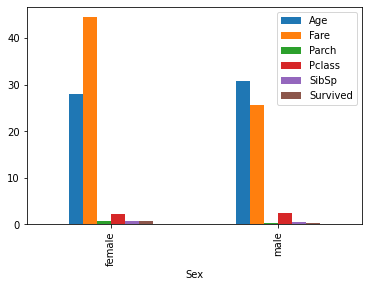

In [8]:
table.plot(kind='bar')


### You can even use more than one feature as an index to group your data. This increases the level of granularity in the resultant table and you can get more specific with your findings:

In [9]:
#multiple indexes
table = pd.pivot_table(df,index=['Sex','Pclass'])
table

Age        Fare     Parch     SibSp  Survived
Sex    Pclass                                                     
female 1       34.611765  106.125798  0.457447  0.553191  0.968085
       2       28.722973   21.970121  0.605263  0.486842  0.921053
       3       21.750000   16.118810  0.798611  0.895833  0.500000
male   1       41.281386   67.226127  0.278689  0.311475  0.368852
       2       30.740707   19.741782  0.222222  0.342593  0.157407
       3       26.507589   12.661633  0.224784  0.498559  0.135447

### I will be using np.mean() for the ‘Age’ feature and np.sum() for the ‘Survived’ feature:



In [12]:
#different aggregate functions
table = pd.pivot_table(df,index=['Sex','Pclass'],aggfunc={'Age':np.mean,'Survived':np.sum})
table

Age  Survived
Sex    Pclass                     
female 1       34.611765        91
       2       28.722973        70
       3       21.750000        72
male   1       41.281386        45
       2       30.740707        17
       3       26.507589        47

In [13]:
table = pd.pivot_table(df,index=['Sex','Pclass'],values=['Survived'], aggfunc=np.mean)
table

Survived
Sex    Pclass          
female 1       0.968085
       2       0.921053
       3       0.500000
male   1       0.368852
       2       0.157407
       3       0.135447

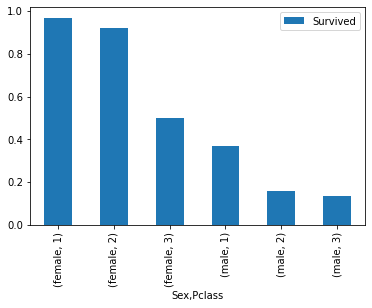

In [14]:
table.plot(kind='bar');

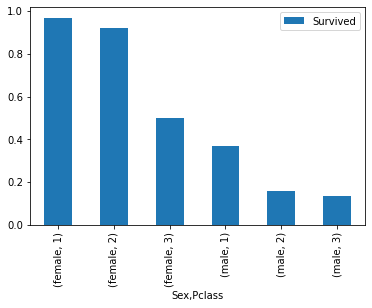

In [15]:
### Using Pclass as a column is easier to understand than using it as an index:

table.plot(kind='bar');

In [16]:
#display null values
table = pd.pivot_table(df,index=['Sex','Survived','Pclass'],columns=['Embarked'],values=['Age'],aggfunc=np.mean)
table

Age                      
Embarked                        C          Q          S
Sex    Survived Pclass                                 
female 0        1       50.000000        NaN  13.500000
                2             NaN        NaN  36.000000
                3       20.700000  28.100000  23.688889
       1        1       35.675676  33.000000  33.619048
                2       19.142857  30.000000  29.091667
                3       11.045455  17.600000  22.548387
male   0        1       43.050000  44.000000  45.362500
                2       29.500000  57.000000  33.414474
                3       27.555556  28.076923  27.168478
       1        1       36.437500        NaN  36.121667
                2        1.000000        NaN  17.095000
                3       18.488571  29.000000  22.933333

In [17]:
#handling null values
table = pd.pivot_table(df,index=['Sex','Survived','Pclass'],columns=['Embarked'],values=['Age'],aggfunc=np.mean,fill_value=np.mean(df['Age']))
table

Age                      
Embarked                        C          Q          S
Sex    Survived Pclass                                 
female 0        1       50.000000  29.699118  13.500000
                2       29.699118  29.699118  36.000000
                3       20.700000  28.100000  23.688889
       1        1       35.675676  33.000000  33.619048
                2       19.142857  30.000000  29.091667
                3       11.045455  17.600000  22.548387
male   0        1       43.050000  44.000000  45.362500
                2       29.500000  57.000000  33.414474
                3       27.555556  28.076923  27.168478
       1        1       36.437500  29.699118  36.121667
                2        1.000000  29.699118  17.095000
                3       18.488571  29.000000  22.933333

In [2]:
dummy_data1 = {
        'id': ['1', '2', '3', '4', '5'],
        'Feature1': ['A', 'C', 'E', 'G', 'I'],
        'Feature2': ['B', 'D', 'F', 'H', 'J']}

In [3]:
df1 = pd.DataFrame(dummy_data1, columns = ['id', 'Feature1', 'Feature2'])
df1

,id,Feature1,Feature2
0,1,A,B
1,2,C,D
2,3,E,F
3,4,G,H
4,5,I,J


In [4]:
df1.shape

(5, 3)

In [9]:
dummy_data2 = {
        'id': ['1', '2', '6', '7', '8'],
        'Feature1': ['K', 'M', 'O', 'Q', 'S'],
        'Feature2': ['L', 'N', 'P', 'R', 'T']}
dummy_data3 = {
        'id': ['1', '2', '3', '4', '5', '7', '8', '9', '10', '11'],
        'Feature3': [12, 13, 14, 15, 16, 17, 15, 12, 13, 23]}


In [12]:
df2 = pd.DataFrame(dummy_data2, columns = ['id', 'Feature1', 'Feature2'])
df3 = pd.DataFrame(dummy_data3, columns = ['id', 'Feature3'])

In [11]:
df2

,id,Feature1,Feature2
0,1,K,L
1,2,M,N
2,6,O,P
3,7,Q,R
4,8,S,T


In [13]:
df3

,id,Feature3
0,1,12
1,2,13
2,3,14
3,4,15
4,5,16
5,7,17
6,8,15
7,9,12
8,10,13
9,11,23


In [14]:
df_row = pd.concat([df1, df2])
df_row

,id,Feature1,Feature2
0,1,A,B
1,2,C,D
2,3,E,F
3,4,G,H
4,5,I,J
0,1,K,L
1,2,M,N
2,6,O,P
3,7,Q,R
4,8,S,T


In [15]:
df_row_reindex = pd.concat([df1, df2], ignore_index=True)
df_row_reindex

,id,Feature1,Feature2
0,1,A,B
1,2,C,D
2,3,E,F
3,4,G,H
4,5,I,J
5,1,K,L
6,2,M,N
7,6,O,P
8,7,Q,R
9,8,S,T


In [16]:
frames = [df1,df2]
df_keys = pd.concat(frames, keys=['x', 'y'])
df_keys

id Feature1 Feature2
x 0  1        A        B
  1  2        C        D
  2  3        E        F
  3  4        G        H
  4  5        I        J
y 0  1        K        L
  1  2        M        N
  2  6        O        P
  3  7        Q        R
  4  8        S        T

In [17]:
df_keys.loc['y']

,id,Feature1,Feature2
0,1,K,L
1,2,M,N
2,6,O,P
3,7,Q,R
4,8,S,T


In [18]:
pieces = {'x': df1, 'y': df2}
df_piece = pd.concat(pieces)
df_piece

id Feature1 Feature2
x 0  1        A        B
  1  2        C        D
  2  3        E        F
  3  4        G        H
  4  5        I        J
y 0  1        K        L
  1  2        M        N
  2  6        O        P
  3  7        Q        R
  4  8        S        T

In [19]:
df_merge_col = pd.merge(df_row, df3, on='id')
df_merge_col

,id,Feature1,Feature2,Feature3
0,1,A,B,12
1,1,K,L,12
2,2,C,D,13
3,2,M,N,13
4,3,E,F,14
5,4,G,H,15
6,5,I,J,16
7,7,Q,R,17
8,8,S,T,15


# Reference:
https://pandas.pydata.org/pandas-docs/stable/user_guide/merging.html